In [1]:
# Import neccessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('used_cars_data.csv')

In [3]:
# Understanding the data
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(7253, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [6]:
df.isna().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [7]:
# when missing value is less than 5% we can drop it
# if a column is missing 80% of data we can drop it 
df.isna().sum().sort_values(ascending=False) /len(df) * 100

New_Price            86.129877
Price                17.013650
Seats                 0.730732
Engine                0.634220
Power                 0.634220
Mileage               0.027575
S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
dtype: float64

In [8]:
# mising values of a category data can only be filled with mode class 
# drop any duplicate 
df.duplicated().sum()

0

In [9]:
# checking Descriptive stat
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [10]:
# outlier: deviate from general pattern in a data set
# dealing with outlier

In [11]:
# Dealing with the data
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [12]:
df.Mileage.unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [13]:
df['Mileage'] = df['Mileage'].str.extract(r'(\d+\.\d+)')

In [14]:
df.Mileage

0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
7248    20.54
7249    17.21
7250    23.08
7251     17.2
7252     10.0
Name: Mileage, Length: 7253, dtype: object

In [15]:
# engine
df.Engine.unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [16]:
df['Engine'] = df['Engine'].str.replace(' CC','')

In [17]:
df['Power'] = df['Power'].str.extract(r'(\d+\.\d+)')

In [18]:
df.New_Price.unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

In [19]:
# covert cr t lakh
def convert(value):
    if isinstance(value, str):
        if 'Cr' in value:
            return float(value.replace(' Cr','')) * 100
        elif 'Lakh' in value:
            return float(value.replace(' Lakh',''))

In [20]:
df['New_Price']= df['New_Price'].apply(convert)

In [21]:
df['New_Price'].unique()

array([   nan,   8.61,  21.  ,  10.65,  32.01,  47.87,  10.57,  12.33,
        11.12,  23.64,  18.64,  19.34,  49.14,  11.81,  16.65,   6.67,
         6.45,   6.41,  27.  ,   5.13,  54.43,   9.51,   9.96,  14.44,
         4.53,  95.04,  13.49, 128.  ,  60.88,   7.39,  69.47,   8.78,
        12.74,  10.52,  11.98,   8.54,  33.58,   9.12,   5.29,  44.28,
        20.74,  11.74,  25.52,  14.07,  95.13,   8.34,   8.85,  25.4 ,
        16.67,  79.43,   6.62, 104.  ,  58.67,  28.37,   4.48,  72.64,
        36.15,  44.59,  12.  ,  14.65,  53.72,  33.91,  12.51,   9.74,
        95.38,  60.59,  11.28,  11.48,  11.26,  43.65,  62.07,  86.97,
       100.  ,   4.74,  14.84,  49.49,  48.18,  12.34,  15.38,  19.21,
        22.95,  11.15,  10.32,  28.05,  59.77,  15.86,  19.43,  42.12,
        16.95,  15.45,   7.87,   4.7 ,  15.02,  12.56,  11.33,  26.45,
        10.34,   7.46,  11.85,  10.41,   5.57,  42.48,  16.04,   9.1 ,
         7.65,  13.74,   5.72,  21.33,  78.76,   4.29,  10.04,  11.67,
      

In [22]:
# converting the data types
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              4464 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [24]:
# Feature Engineering
df.Name

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object

In [25]:
# ectracting car brand and model
df['Name'].str.split()

0                            [Maruti, Wagon, R, LXI, CNG]
1                 [Hyundai, Creta, 1.6, CRDi, SX, Option]
2                                        [Honda, Jazz, V]
3                                   [Maruti, Ertiga, VDI]
4                  [Audi, A4, New, 2.0, TDI, Multitronic]
                              ...                        
7248               [Volkswagen, Vento, Diesel, Trendline]
7249                          [Volkswagen, Polo, GT, TSI]
7250                          [Nissan, Micra, Diesel, XV]
7251                          [Volkswagen, Polo, GT, TSI]
7252    [Mercedes-Benz, E-Class, 2009-2013, E, 220, CD...
Name: Name, Length: 7253, dtype: object

In [26]:
df['brand'] = df['Name'].str.split().str.get(0)
df['brand']

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: brand, Length: 7253, dtype: object

In [27]:
df['Model'] = df['Name'].str.split().str.get(1)+' '+ df['Name'].str.split().str.get(2)
df['Model']

0                 Wagon R
1               Creta 1.6
2                  Jazz V
3              Ertiga VDI
4                  A4 New
              ...        
7248         Vento Diesel
7249              Polo GT
7250         Micra Diesel
7251              Polo GT
7252    E-Class 2009-2013
Name: Model, Length: 7253, dtype: object

In [28]:
df.brand.nunique()

33

In [29]:
df.brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [30]:
list = ['Isuzu', 'ISUZU', 'Land']
df['brand'] = df['brand'].replace({
    'ISUZU' : 'Isuzu',
    'Land' : 'Land Rover'
}) 

In [31]:
df.brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [32]:
df[['Price', 'New_Price']]

,Price,New_Price
0,1.75,NaN
1,12.50,NaN
2,4.50,8.61
3,6.00,NaN
4,17.74,NaN
...,...,...
7248,NaN,NaN
7249,NaN,NaN
7250,NaN,NaN
7251,NaN,NaN


In [33]:
from datetime import date

In [34]:
Current_year = date.today().year
df['car_age'] = Current_year - df['Year']

In [35]:
df['Price'] = np.where(df['Price'].isna(), df['New_Price'], df['Price'])

In [36]:
df['Price']

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
7248      NaN
7249      NaN
7250      NaN
7251      NaN
7252      NaN
Name: Price, Length: 7253, dtype: float64

In [37]:
df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,brand,Model,car_age
3774,3774,Maruti Ciaz Zeta,Kochi,2018,10575,Petrol,Manual,First,21.56,1462.0,103.25,5.0,11.11,9.18,Maruti,Ciaz Zeta,7
2159,2159,Mahindra XUV500 W8 2WD,Kochi,2014,49663,Diesel,Manual,First,15.10,2179.0,NaN,7.0,NaN,8.42,Mahindra,XUV500 W8,11
1818,1818,Hyundai Grand i10 Asta,Kolkata,2014,37000,Petrol,Manual,First,18.90,1197.0,NaN,5.0,NaN,3.50,Hyundai,Grand i10,11
139,139,Honda Civic 2006-2010 1.8 V MT,Delhi,2012,88578,Petrol,Manual,First,13.50,1799.0,NaN,5.0,NaN,3.95,Honda,Civic 2006-2010,13
7147,7147,Hyundai Santro Xing GLS,Coimbatore,2009,61259,Petrol,Manual,First,17.92,1086.0,62.10,5.0,NaN,NaN,Hyundai,Santro Xing,16


In [38]:
# drop unnecessary column
df.drop(columns=['S.No.', 'Name', 'New_Price'], inplace=True)

In [39]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand,Model,car_age
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R,15
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6,10
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,14
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,13
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New,12


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              4464 non-null   float64
 9   Seats              7200 non-null   float64
 10  Price              6201 non-null   float64
 11  brand              7253 non-null   object 
 12  Model              7252 non-null   object 
 13  car_age            7253 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


In [41]:
# separate into numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [42]:
num_cols

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'car_age']

In [43]:
cat_cols 

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand', 'Model']

(array([  32., 2827., 2221., 1316.,  746.,   34.,    9.,   13.,    4.,
           5.]),
 array([  72. ,  664.6, 1257.2, 1849.8, 2442.4, 3035. , 3627.6, 4220.2,
        4812.8, 5405.4, 5998. ]),
 <BarContainer object of 10 artists>)

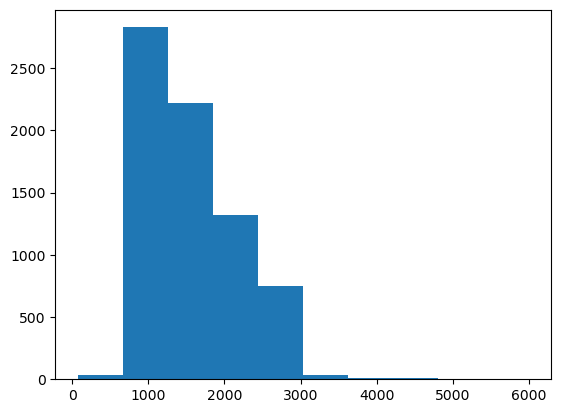

In [44]:
# Distribution of a numerical column
plt.hist(df['Engine'])

<Axes: xlabel='Engine', ylabel='Count'>

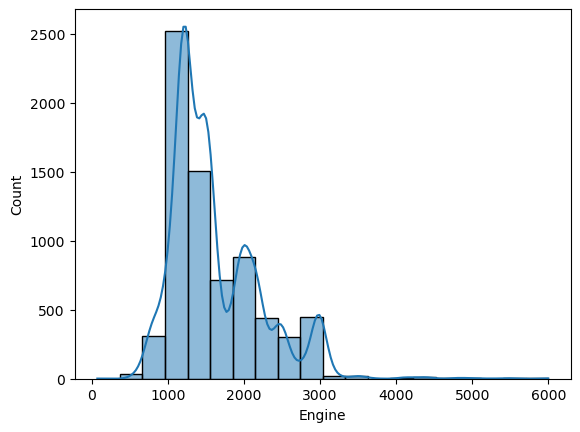

In [45]:
sns.histplot(df['Engine'], bins=20, kde=True)

<Axes: ylabel='Engine'>

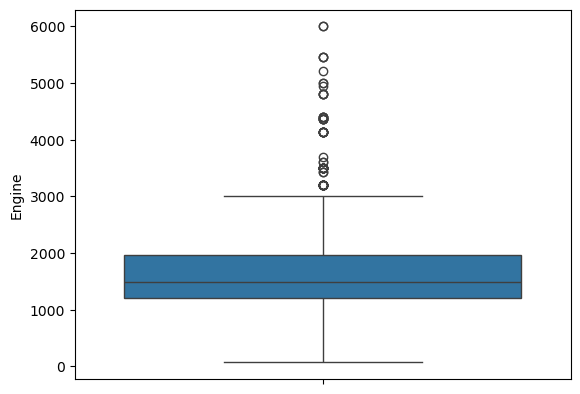

In [46]:
sns.boxplot(df['Engine'])

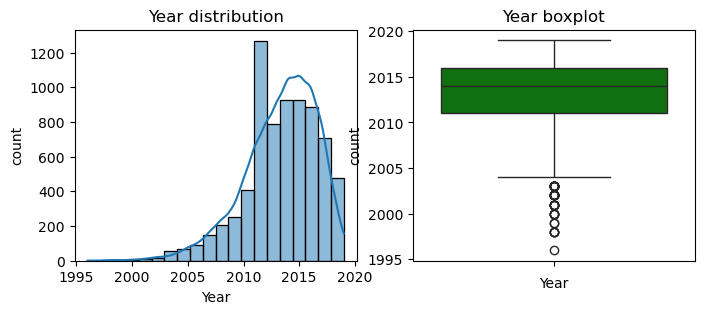

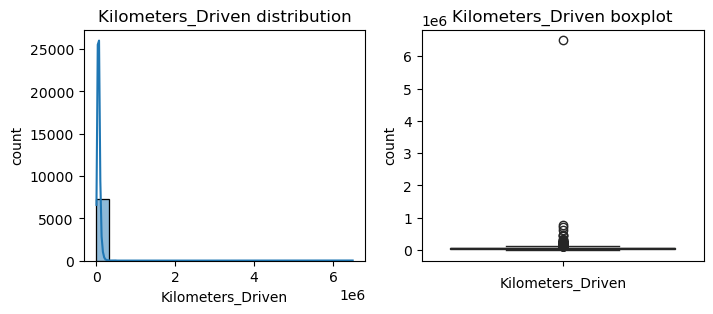

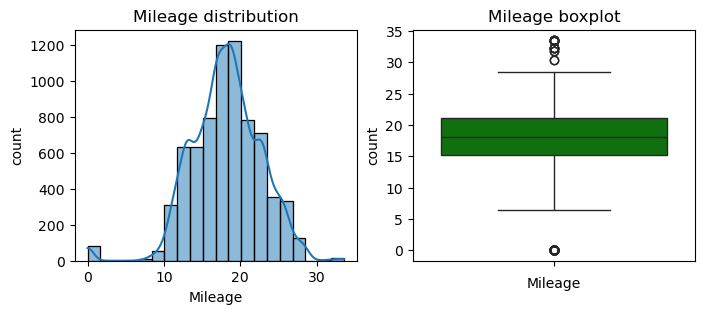

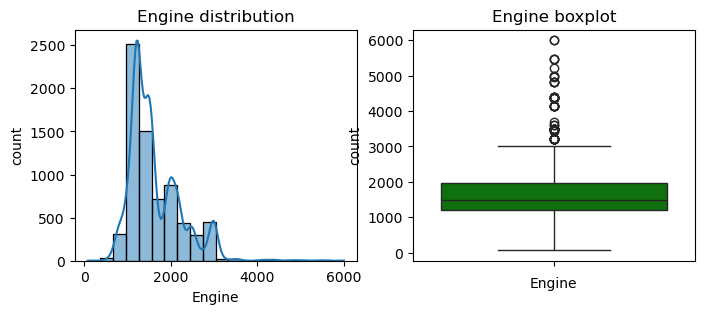

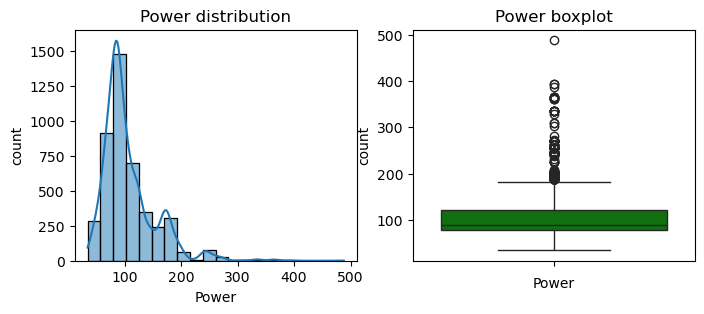

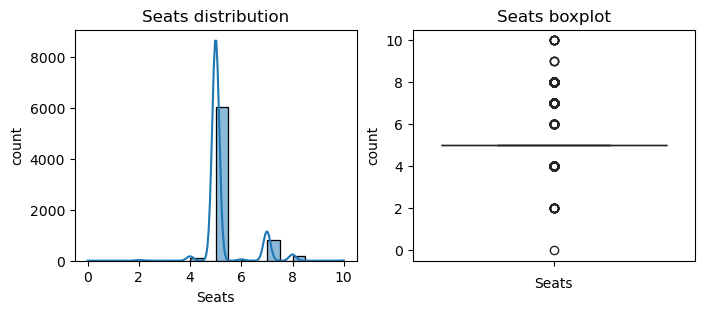

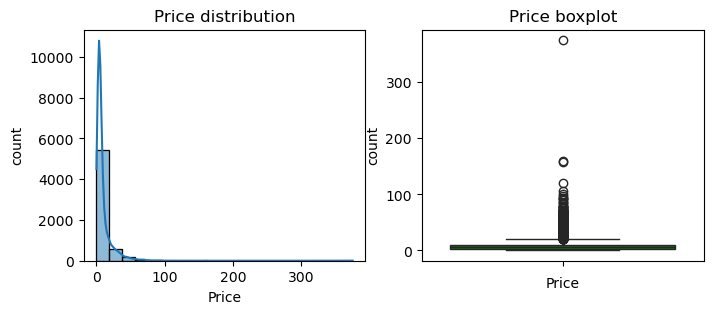

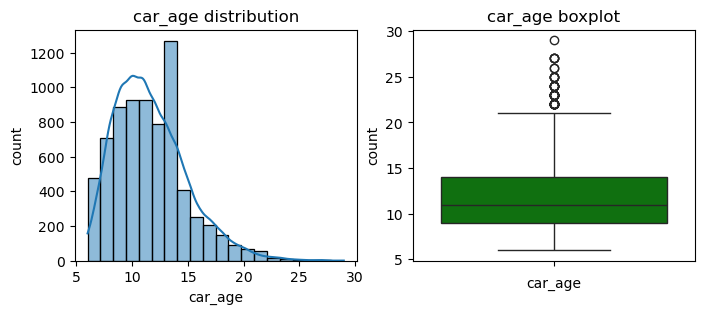

In [47]:
# loop through numerical columns
for col in num_cols:
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col], color='green')
    plt.title(f'{col} boxplot')
    plt.xlabel(col)
    plt.ylabel('count')

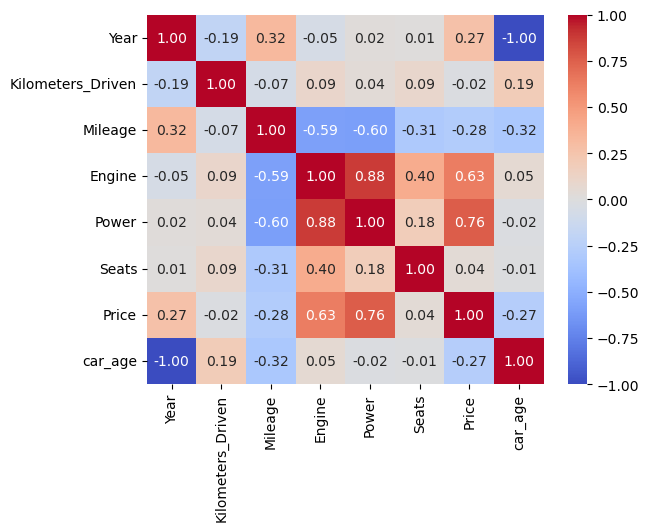

In [48]:
corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt ='.2f', cmap='coolwarm')
plt.show()

##### Continuation on Exploring data analysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('netflix_titles - netflix_titles.csv')

In [51]:
df.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3584,60001807,Movie,The Naked Gun: From the Files of Police Squad!,David Zucker,"Leslie Nielsen, Priscilla Presley, Ricardo Mon...",United States,"January 1, 2020",1988,PG-13,85 min,"Comedies, Cult Movies","In this slapstick comedy classic, hapless cop ..."
1602,70109249,Movie,C Kkompany,Sachin Yardi,"Mahesh Bhatt, Mithun Chakraborty, G.K. Desai, ...",India,"May 31, 2019",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...","To blow off some steam, friends Akshay, Joshi ..."


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [53]:
df.isna().sum().sort_values(ascending=False)

director        1969
cast             570
country          476
date_added        11
rating            10
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [54]:
# date column to date time
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [55]:
df['date_added'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6234 entries, 0 to 6233
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
6223 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 48.8 KB


In [56]:
# dealing with category missing values
df['director'].fillna('unknown', inplace=True)

In [57]:
df['cast'].fillna('unknown', inplace=True)

In [58]:
df['country'].fillna('unknown', inplace=True)

In [59]:
df['rating'].fillna('unknown', inplace=True)

In [60]:
# Clean duration columns
df['duration'].unique()

array(['90 min', '94 min', '1 Season', '99 min', '110 min', '60 min',
       '78 min', '95 min', '58 min', '62 min', '65 min', '61 min',
       '135 min', '98 min', '96 min', '79 min', '113 min', '80 min',
       '77 min', '112 min', '106 min', '102 min', '114 min', '125 min',
       '142 min', '133 min', '100 min', '86 min', '146 min', '10 min',
       '122 min', '126 min', '116 min', '130 min', '70 min', '128 min',
       '88 min', '108 min', '93 min', '64 min', '107 min', '92 min',
       '111 min', '103 min', '40 min', '85 min', '72 min', '45 min',
       '89 min', '24 min', '127 min', '163 min', '117 min', '42 min',
       '104 min', '75 min', '82 min', '38 min', '97 min', '81 min',
       '91 min', '152 min', '87 min', '121 min', '101 min', '119 min',
       '83 min', '182 min', '124 min', '63 min', '139 min', '171 min',
       '84 min', '69 min', '76 min', '41 min', '153 min', '141 min',
       '52 min', '137 min', '132 min', '157 min', '109 min', '105 min',
       '25 min', '71

In [61]:
# normalize duration column
def covert_durations(duration):
    if 'min' in duration:
        return int(duration.replace(' min', ''))
    elif 'Seasons' in duration:
        num_Seasons = int(duration.replace(' Seasons', ''))
        return num_Seasons * 50 # 50 is average min per season
    elif 'Season' in duration:
        num_Seasons = int(duration.replace(' Season', ''))
        return num_Seasons * 50 # 50 is average min per season
df['duration'] = df['duration'].apply(covert_durations)
df['duration']

0        90
1        94
2        50
3        50
4        99
       ... 
6229    650
6230    200
6231     60
6232    100
6233    500
Name: duration, Length: 6234, dtype: int64

In [62]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [63]:
df['release_year'].value_counts()

release_year
2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1966       1
1959       1
1964       1
1925       1
1963       1
Name: count, Length: 72, dtype: int64

In [64]:
df['director'].value_counts()

director
unknown                        1969
Raúl Campos, Jan Suter           18
Marcus Raboy                     14
Jay Karas                        13
Jay Chapman                      12
                               ... 
Ruel S. Bayani                    1
Peter Mortimer, Josh Lowell       1
Greg Coolidge                     1
Owen Egerton                      1
Onur Ünlü                         1
Name: count, Length: 3302, dtype: int64

In [65]:
df['listed_in'].value_counts()

listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Comedies, TV Dramas, TV Mysteries                  1
Classic Movies, Dramas, LGBTQ Movies                  1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy        1
Docuseries, Reality TV, Teen TV Shows                 1
Reality TV, Spanish-Language TV Shows                 1
Name: count, Length: 461, dtype: int64

In [66]:
Genre = df['listed_in'].str.split(', ').explode()

In [67]:
Genre.value_counts()

listed_in
International Movies            1927
Dramas                          1623
Comedies                        1113
International TV Shows          1001
Documentaries                    668
TV Dramas                        599
Action & Adventure               597
Independent Movies               552
TV Comedies                      436
Thrillers                        392
Children & Family Movies         378
Romantic Movies                  376
Crime TV Shows                   363
Kids' TV                         328
Stand-Up Comedy                  281
Docuseries                       279
Romantic TV Shows                278
Horror Movies                    262
Music & Musicals                 243
British TV Shows                 210
Sci-Fi & Fantasy                 193
Sports Movies                    157
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            126
Spanish-Language TV Shows        117
Anime Series                

<Axes: xlabel='listed_in'>

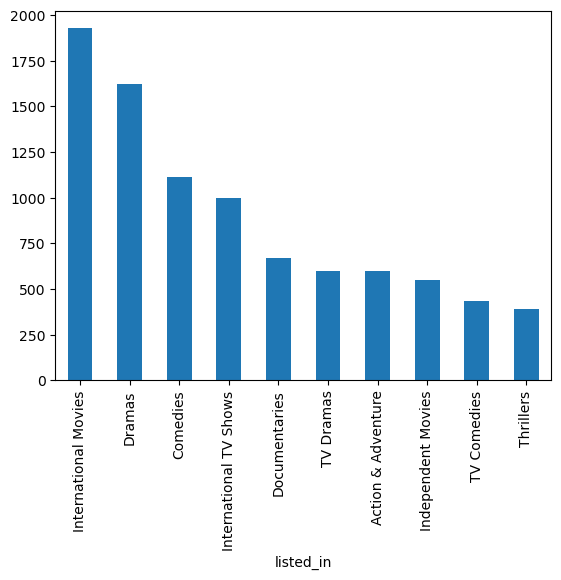

In [68]:
Genre.value_counts().head(10).plot(kind='bar')

In [69]:
df['cast'].dropna()

0       Alan Marriott, Andrew Toth, Brian Dobson, Cole...
1                                        Jandino Asporaat
2       Peter Cullen, Sumalee Montano, Frank Welker, J...
3       Will Friedle, Darren Criss, Constance Zimmer, ...
4       Nesta Cooper, Kate Walsh, John Michael Higgins...
                              ...                        
6229    Burnie Burns, Jason Saldaña, Gustavo Sorola, G...
6230    Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...
6231                                              unknown
6232    Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...
6233    Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...
Name: cast, Length: 6234, dtype: object

In [70]:
df['cast'].str.replace(', ', ' ')

0       Alan Marriott Andrew Toth Brian Dobson Cole Ho...
1                                        Jandino Asporaat
2       Peter Cullen Sumalee Montano Frank Welker Jeff...
3       Will Friedle Darren Criss Constance Zimmer Kha...
4       Nesta Cooper Kate Walsh John Michael Higgins K...
                              ...                        
6229    Burnie Burns Jason Saldaña Gustavo Sorola Geof...
6230    Marc Maron Judd Hirsch Josh Brener Nora Zehetn...
6231                                              unknown
6232    Daniel Radcliffe Jon Hamm Adam Godley Christop...
6233    Jennifer Aniston Courteney Cox Lisa Kudrow Mat...
Name: cast, Length: 6234, dtype: object

In [76]:
' '.join(df['cast'].str.replace(', ', ' '))

'Alan Marriott Andrew Toth Brian Dobson Cole Howard Jennifer Cameron Jonathan Holmes Lee Tockar Lisa Durupt Maya Kay Michael Dobson Jandino Asporaat Peter Cullen Sumalee Montano Frank Welker Jeffrey Combs Kevin Michael Richardson Tania Gunadi Josh Keaton Steve Blum Andy Pessoa Ernie Hudson Daran Norris Will Friedle Will Friedle Darren Criss Constance Zimmer Khary Payton Mitchell Whitfield Stuart Allan Ted McGinley Peter Cullen Nesta Cooper Kate Walsh John Michael Higgins Keith Powers Alicia Sanz Jake Borelli Kid Ink Yousef Erakat Rebekah Graf Anne Winters Peter Gilroy Patrick Davis Alberto Ammann Eloy Azorín Verónica Echegui Lucía Jiménez Claudia Traisac Antonio Banderas Dylan McDermott Melanie Griffith Birgitte Hjort Sørensen Robert Forster Christa Campbell Tim McInnerny Andy Nyman David Ryall Fabrizio Copano unknown James Franco Kate Hudson Tom Wilkinson Omar Sy Sam Spruell Anna Friel Thomas Arnold Oliver Dimsdale Diana Hardcastle Michael Jibson Diarmaid Murtagh Joaquín Reyes Jim Stu

In [77]:
# visualize cast with word
df['cast'].isna().sum()

0

In [73]:
!pip install wordcloud

In [74]:
from wordcloud import WordCloud

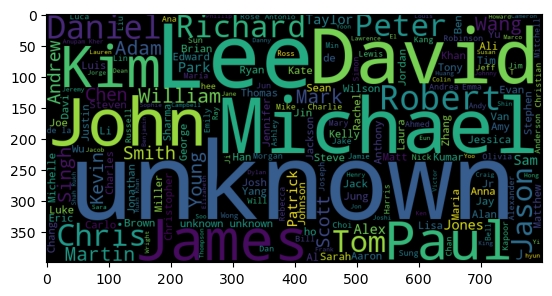

In [75]:
actor_text = ' '.join(df['cast'].str.replace(', ', ' '))
visual = WordCloud(width=800, height=400).generate(actor_text)
plt.imshow(visual)